## K-Means Clustering

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

# Load the iris dataset
iris=datasets.load_iris() # Dict
iris_df=pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head() # Gives us the first 5 rows to view as a sample

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


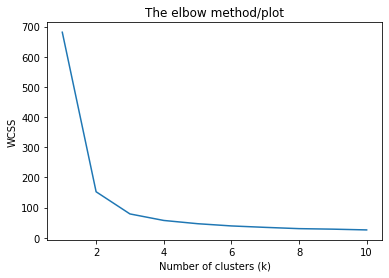

In [2]:
## Step 2 : Need to find the optimal k to use
# Elbow Method

# Convert our dataframe to a form which is usable by kmeans
x = iris_df.iloc[:,[0,1,2,3]].values # loc

# Import our kmeans algorithm
from sklearn.cluster import KMeans

# WCSS - Plot the elbow plot
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x) # train the algorithm with the input data (x)
    wcss.append(kmeans.inertia_) # WCSS is also called inertia
    
# Plot the results on a line chart
# Allow us to observe the elbow
plt.plot(range(1,11), wcss)
plt.title('The elbow method/plot')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [3]:
# We have decided on a k value = 3
kmeans = KMeans(n_clusters=3)
kmeans_model = kmeans.fit(x) # Training the model on input data

y_kmeans = kmeans_model.predict(x)

In [4]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

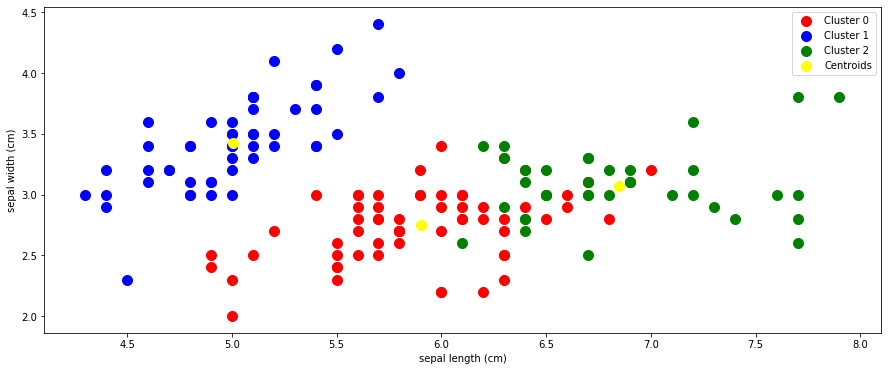

In [5]:
# Visualize the clusters
# 2D plots on any 2 columns

plt.figure(figsize=(15,6))

# Plot scatter plots
plt.scatter(x[y_kmeans==0,0], x[y_kmeans==0,1],
           s=100, c='red', label='Cluster 0')
plt.scatter(x[y_kmeans==1,0], x[y_kmeans==1,1],
           s=100, c='blue', label='Cluster 1')
plt.scatter(x[y_kmeans==2,0], x[y_kmeans==2,1],
           s=100, c='green', label='Cluster 2')

# Cluster Centroids
plt.scatter(kmeans_model.cluster_centers_[:,0], kmeans_model.cluster_centers_[:,1],
           s=100, c='yellow', label='Centroids')

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()
plt.show()

In [8]:
kmeans_model.predict([[1.2,3.4,5.5,6.7]])[0]

0